# CODING TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [3]:
import numpy as np # Multi-dimensional array manipulation
import pandas as pd # DataFrame Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
from sklearn import metrics


In [4]:
# Read the CSV file
telecom_df = pd.read_csv("telecom_churn.csv")

In [5]:
# Load the top 5 instances
telecom_df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [6]:
# Load the bottom 5 instances
telecom_df.tail()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0
4999,46,86,415,2412,0,1,34,129.4,102,22.00,...,104,22.70,154.8,100,6.97,9.3,16,2.51,0,0


In [7]:
# Check the shape of the dataframe
telecom_df.shape

(5000, 21)

In [8]:
# Display the feature columns
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [9]:
# Obtain the summary of the dataframe data types
telecom_df.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is the maximum and average daily minutes?**

In [10]:
telecom_df['Daily Minutes'] = telecom_df['total_day_minutes'] + telecom_df['total_eve_minutes'] + telecom_df['total_night_minutes']
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class,Daily Minutes
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400,581.317080
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469,89.071948
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000,520.600000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,581.850000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000,642.025000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,876.900000


# CODING TASK #2: PERFORM DATA VISUALIZATION

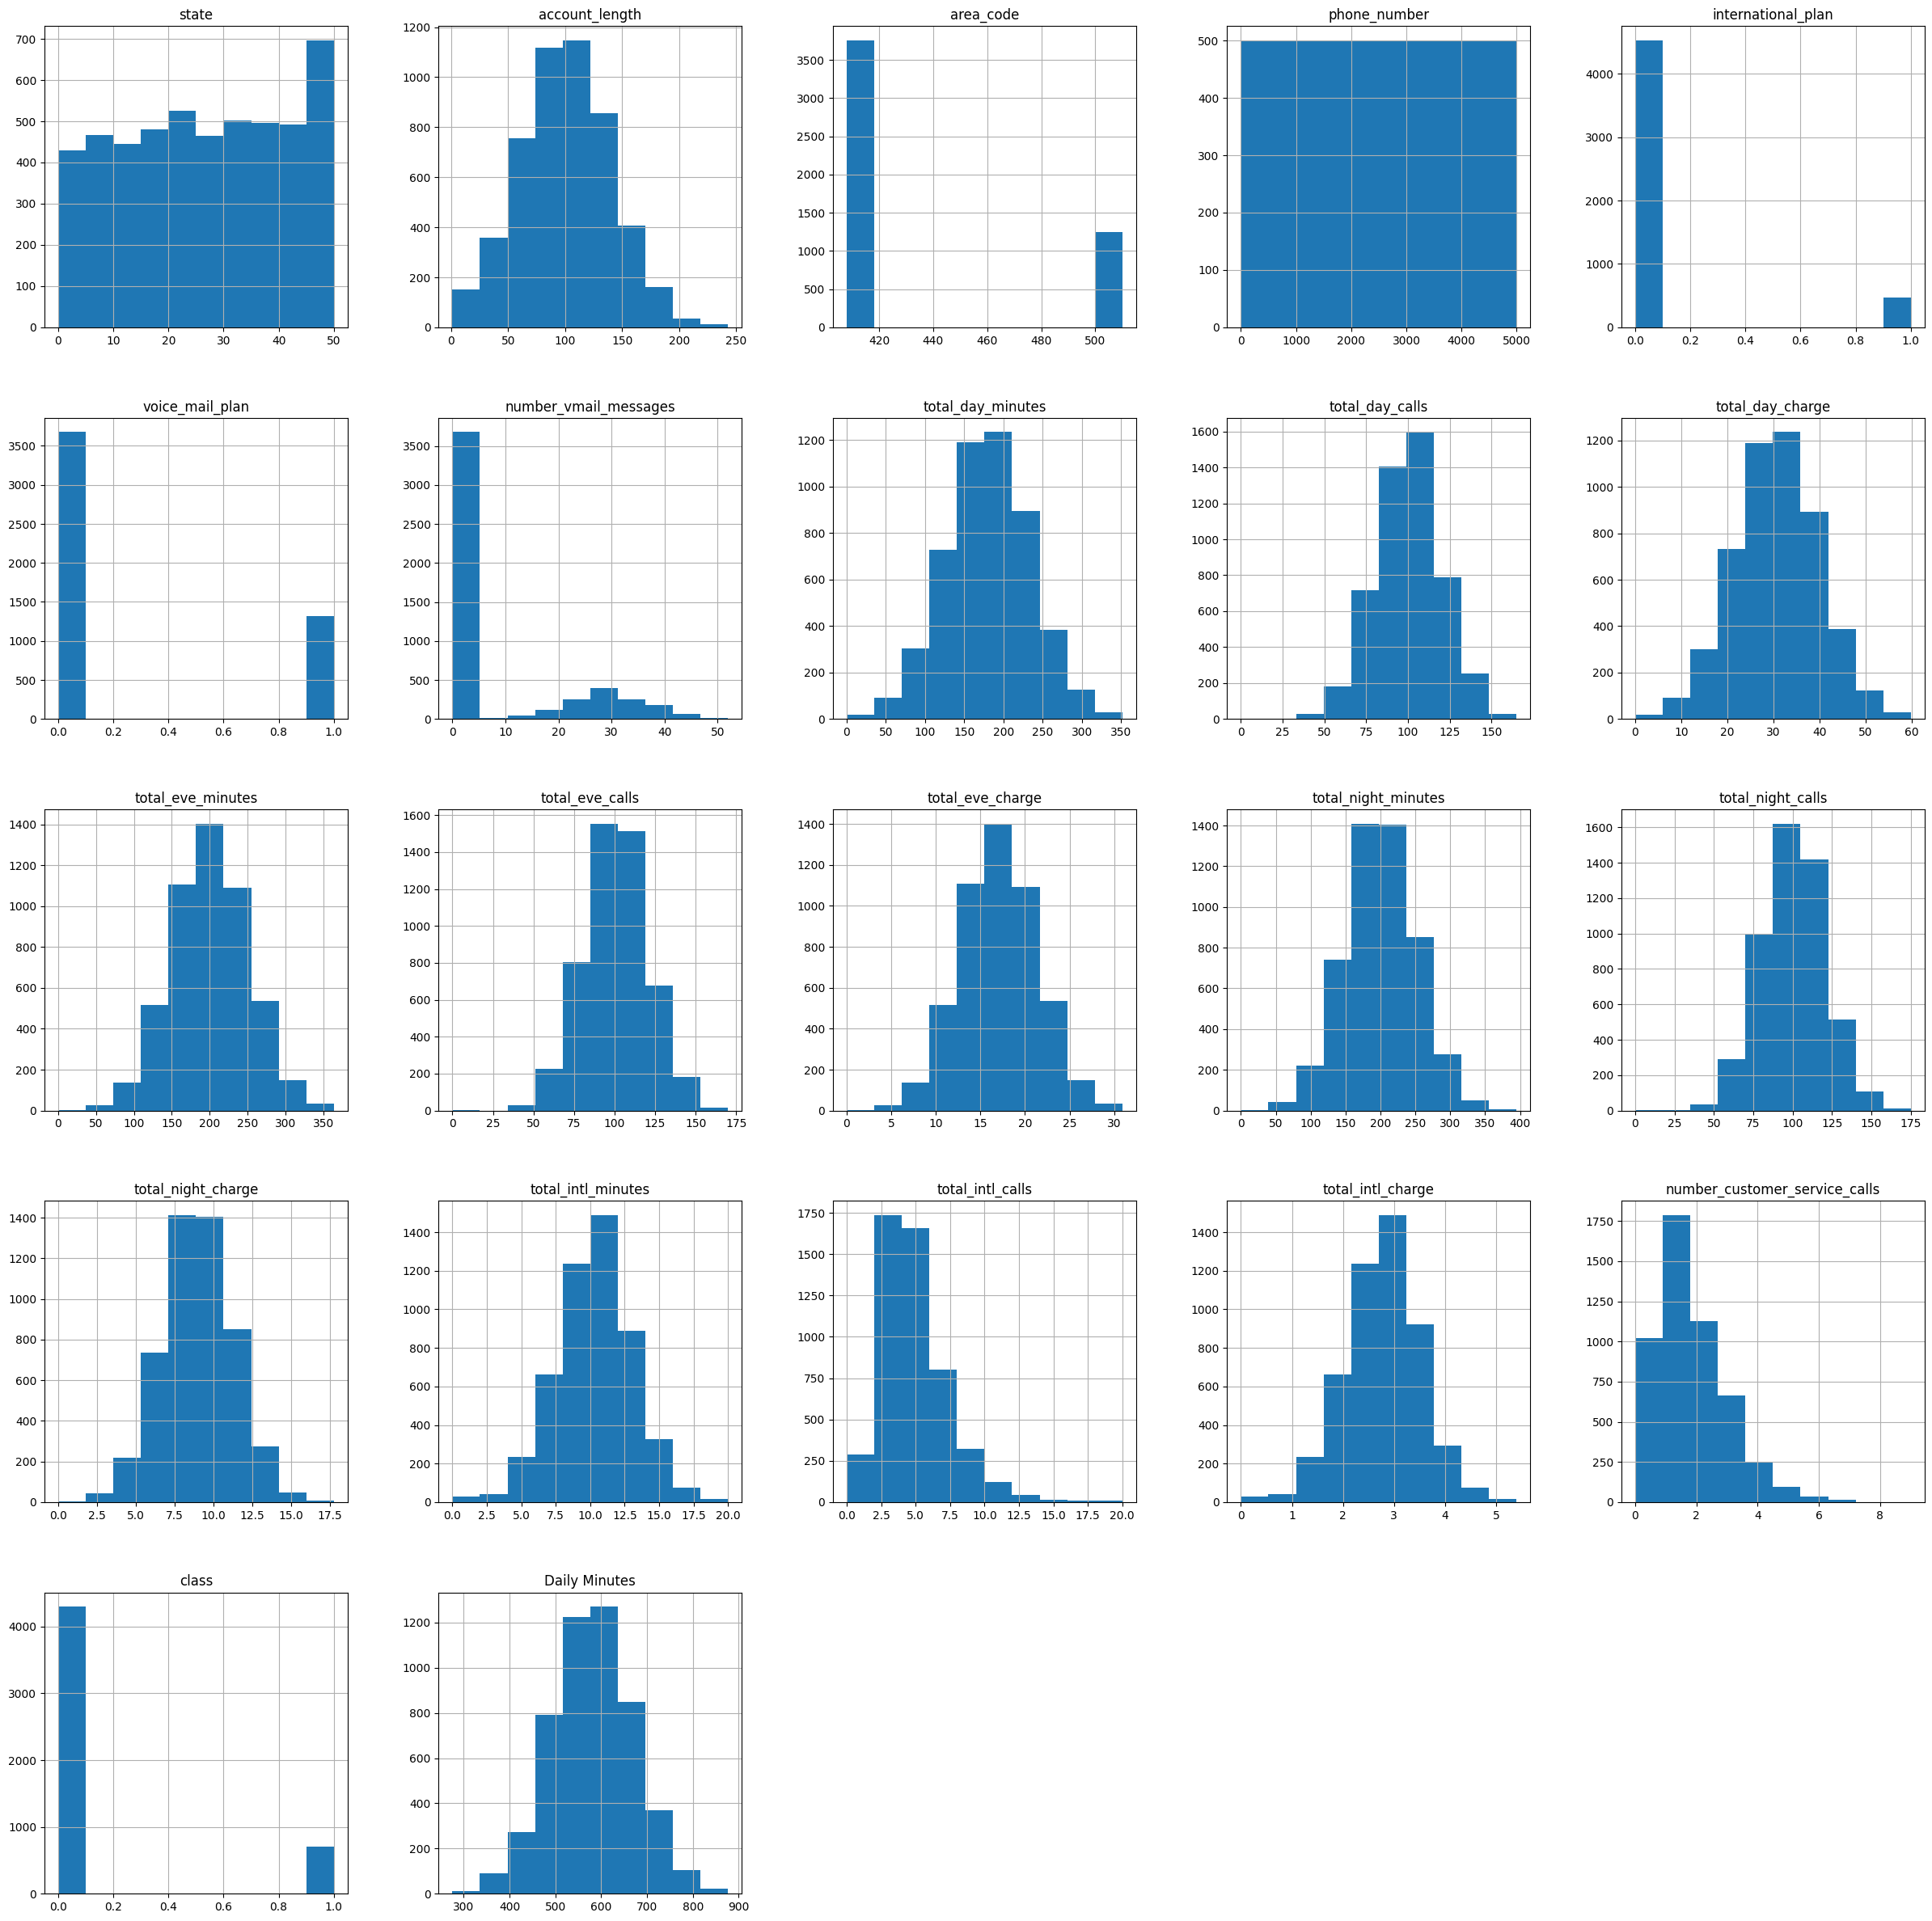

In [11]:
telecom_df.hist(figsize = (30, 30))
plt.show()

In [12]:
telecom_df["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

<Axes: ylabel='class'>

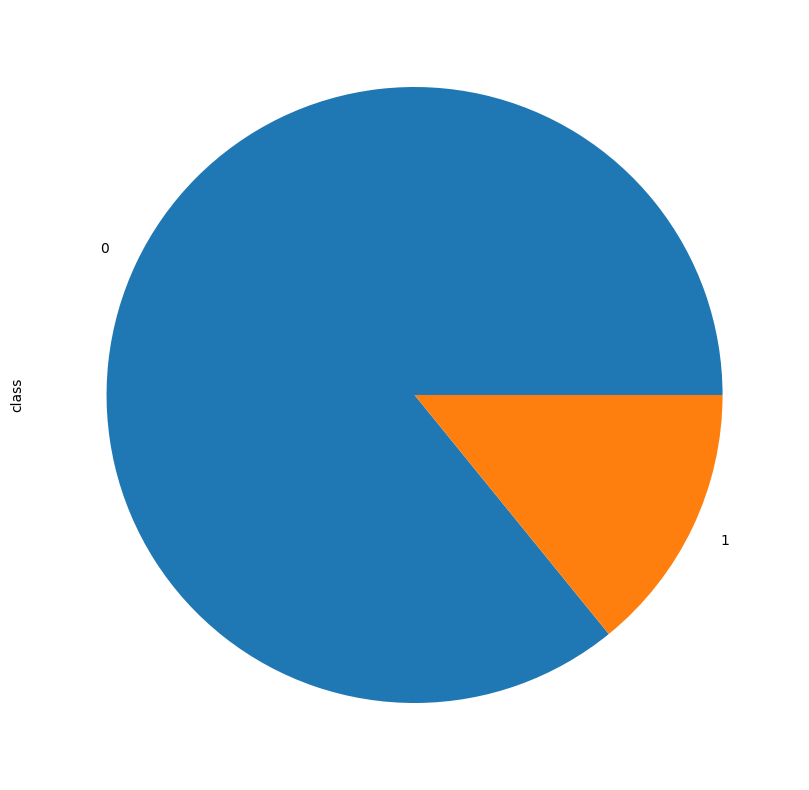

In [13]:
plt.figure(figsize = [10, 10])
telecom_df["class"].value_counts().plot.pie()

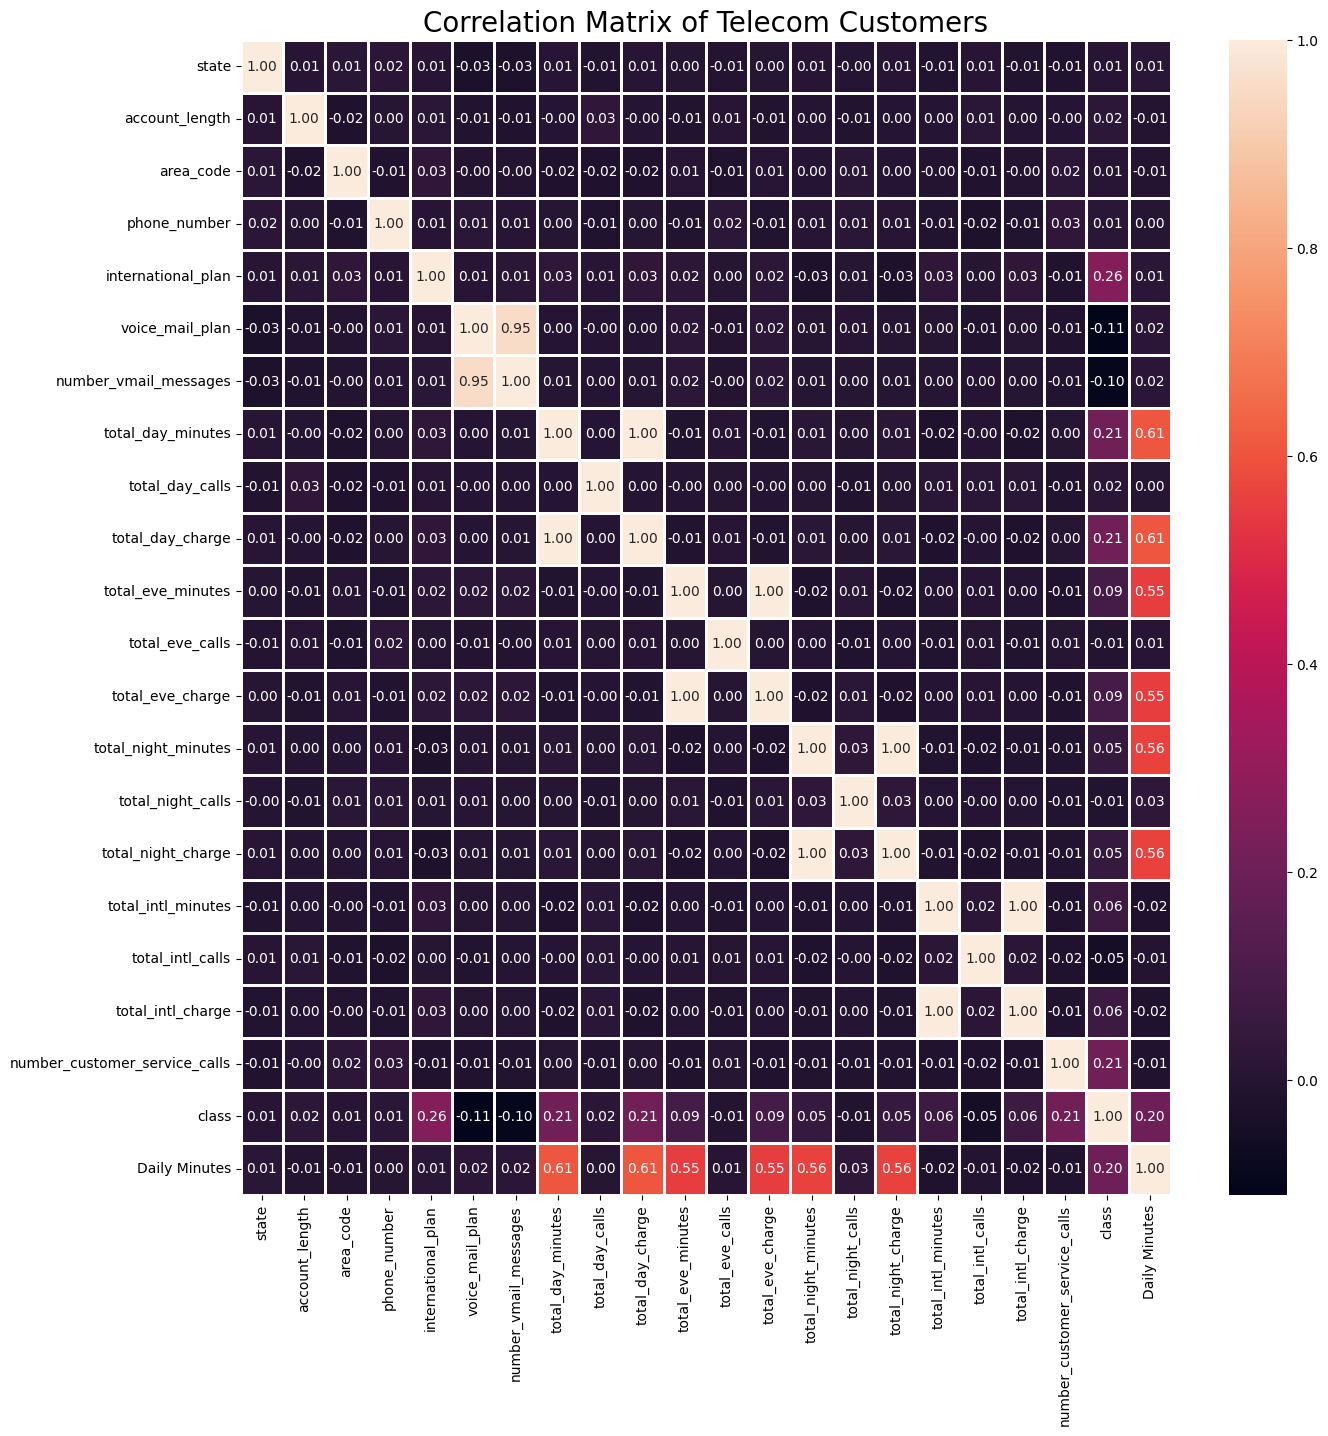

In [14]:
# Correlation Matrix
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

# It is clearly shown that "voice_mail_plan" and "number_vmail_messages" are highly correlated.
# It is clearly shown that "total day charge" and "total daily minutes" are highly correlated.

<ipython-input-15-2d2ad3904732>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
<ipython-input-15-2d2ad3904732>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Distribution of day charges by churn')

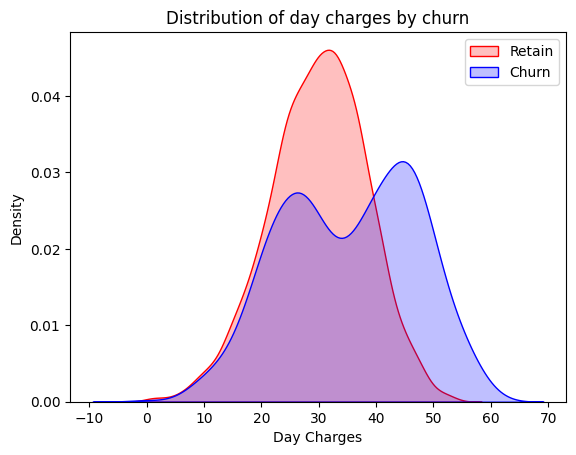

In [15]:
# Churn by day charges
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

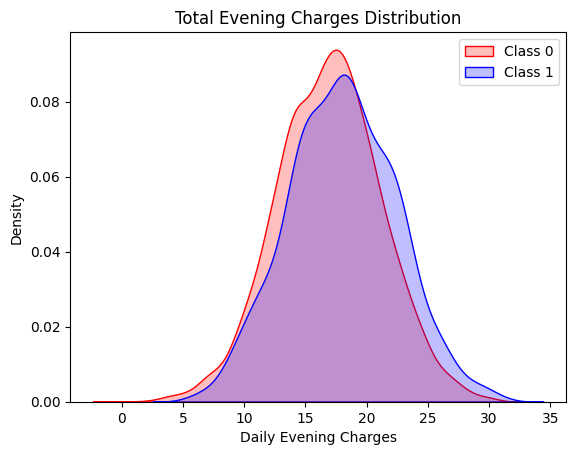

In [16]:
sns.kdeplot(data=telecom_df[telecom_df['class']==0]['total_eve_charge'], color = 'r', fill=True, label = 'Class 0')
sns.kdeplot(data=telecom_df[telecom_df['class']==1]['total_eve_charge'], color = 'b', fill=True, label = 'Class 1')
plt.xlabel('Daily Evening Charges')
plt.title('Total Evening Charges Distribution')
plt.legend()

# CODING TASK #3: IDENTIFY FEATURE IMPORTANCE & PREPARE THE DATA BEFORE MODEL TRAINING

In [17]:
# Unnecessary features would decrease the training speed, the model interpretability and the generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigning input features to X and output (Churn) to y

X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns") # area_code and phone_number features are irrelevant to proceed further to train the model
y = telecom_df["class"]

In [18]:
X.shape

(5000, 19)

In [19]:
y.shape

(5000,)

In [20]:
# Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150)

In [21]:
X_train.shape

(3500, 19)

In [22]:
X_test.shape

(1500, 19)

In [23]:
y_train.shape

(3500,)

In [24]:
y_test.shape

(1500,)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

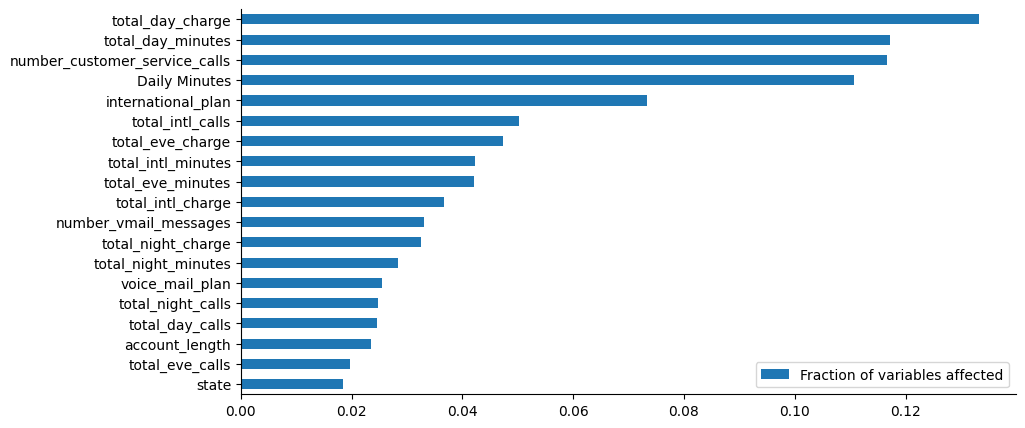

In [26]:
# Plot the feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

In [27]:
# The above graph is generated by Random Forest algorithm
# The graph indicates that "total_day_minutes" tops the list of important features followed by "total_day_minutes" and so on.

# CODING TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_predict = model_LR.predict(X_test)

In [30]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.33      0.06      0.10       201

    accuracy                           0.86      1500
   macro avg       0.60      0.52      0.51      1500
weighted avg       0.80      0.86      0.81      1500



**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Print out the confusion Matrix and comment on the results**


In [31]:
print(confusion_matrix(y_test, y_predict))

[[1275   24]
 [ 189   12]]


# CODING TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [32]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [33]:
y_predict = model_svm.predict(X_test)

In [34]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1299
           1       0.51      0.17      0.26       201

    accuracy                           0.87      1500
   macro avg       0.70      0.57      0.59      1500
weighted avg       0.83      0.87      0.84      1500



<Axes: >

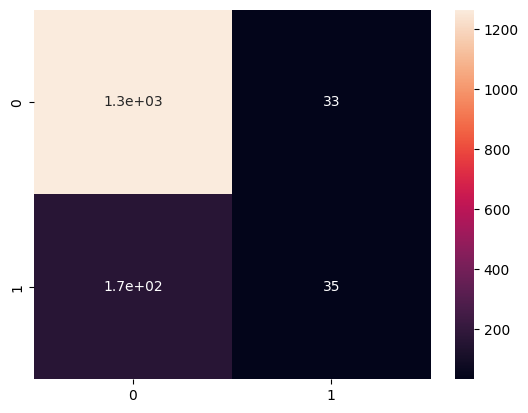

In [35]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_predict = model_rf.predict(X_test)

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1299
           1       0.96      0.77      0.85       201

    accuracy                           0.96      1500
   macro avg       0.96      0.88      0.92      1500
weighted avg       0.96      0.96      0.96      1500



In [39]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1293,    6],
       [  47,  154]])

# CODING TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_predict = model_knn.predict(X_test)

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1299
           1       0.71      0.29      0.42       201

    accuracy                           0.89      1500
   macro avg       0.81      0.64      0.68      1500
weighted avg       0.87      0.89      0.87      1500



<Axes: >

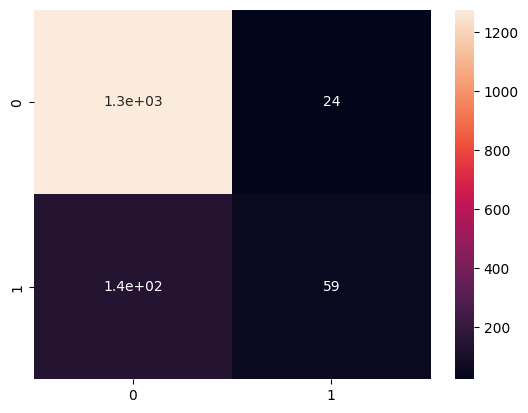

In [43]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

# CODING TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
y_predict = model_gnb.predict(X_test)

In [47]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1299
           1       0.54      0.59      0.56       201

    accuracy                           0.88      1500
   macro avg       0.74      0.75      0.75      1500
weighted avg       0.88      0.88      0.88      1500



<Axes: >

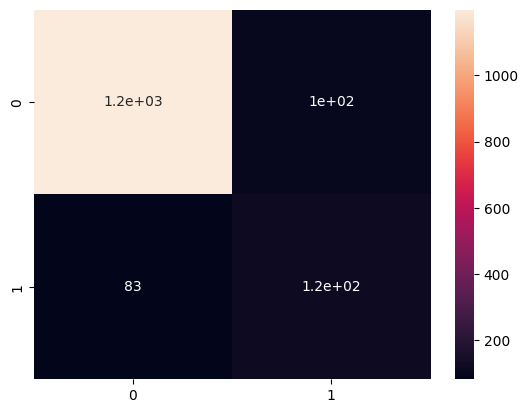

In [48]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

# CODING TASK #9: COMPARE TRAINED CLASSIFIER MODELS AND CONCLUDING REMARKS

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [49]:
model_LR.predict_proba(X_test)
# The first element is the probability that the output will be 0
# The second element is the probabiliy that the output will be 1

array([[0.97120344, 0.02879656],
       [0.92969659, 0.07030341],
       [0.89334052, 0.10665948],
       ...,
       [0.91046597, 0.08953403],
       [0.95312963, 0.04687037],
       [0.98129948, 0.01870052]])

In [50]:
model_LR.predict_proba(X_test)[:, 1]

array([0.02879656, 0.07030341, 0.10665948, ..., 0.08953403, 0.04687037,
       0.01870052])

In [51]:
y_test

4827    0
1793    0
2957    0
4218    0
2188    0
       ..
4230    1
3824    0
262     0
1100    0
4359    0
Name: class, Length: 1500, dtype: int64

In [52]:
fpr1, tpr1, thresh1 = metrics.roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label= 1)

In [53]:
fpr1

array([0.00000000e+00, 7.69822941e-04, 7.69822941e-04, 3.07929176e-03,
       3.07929176e-03, 4.61893764e-03, 4.61893764e-03, 7.69822941e-03,
       7.69822941e-03, 8.46805235e-03, 8.46805235e-03, 1.53964588e-02,
       1.53964588e-02, 1.61662818e-02, 1.61662818e-02, 1.84757506e-02,
       1.84757506e-02, 2.00153965e-02, 2.00153965e-02, 2.07852194e-02,
       2.07852194e-02, 2.23248653e-02, 2.23248653e-02, 2.30946882e-02,
       2.30946882e-02, 2.38645112e-02, 2.38645112e-02, 2.46343341e-02,
       2.46343341e-02, 2.54041570e-02, 2.54041570e-02, 2.77136259e-02,
       2.77136259e-02, 3.07929176e-02, 3.07929176e-02, 3.38722094e-02,
       3.38722094e-02, 3.69515012e-02, 3.69515012e-02, 3.84911470e-02,
       3.84911470e-02, 3.92609700e-02, 3.92609700e-02, 4.08006159e-02,
       4.08006159e-02, 4.15704388e-02, 4.15704388e-02, 4.54195535e-02,
       4.54195535e-02, 5.08083141e-02, 5.08083141e-02, 5.31177829e-02,
       5.31177829e-02, 5.38876059e-02, 5.38876059e-02, 5.46574288e-02,
      

In [54]:
tpr1

array([0.        , 0.        , 0.00497512, 0.00497512, 0.01492537,
       0.01492537, 0.02487562, 0.02487562, 0.03482587, 0.03482587,
       0.039801  , 0.039801  , 0.04477612, 0.04477612, 0.05970149,
       0.05970149, 0.06467662, 0.06467662, 0.06965174, 0.06965174,
       0.07462687, 0.07462687, 0.08457711, 0.08457711, 0.08955224,
       0.08955224, 0.09452736, 0.09452736, 0.09950249, 0.09950249,
       0.10447761, 0.10447761, 0.11442786, 0.11442786, 0.12437811,
       0.12437811, 0.12935323, 0.12935323, 0.13930348, 0.13930348,
       0.15422886, 0.15422886, 0.15920398, 0.15920398, 0.1641791 ,
       0.1641791 , 0.17910448, 0.17910448, 0.1840796 , 0.1840796 ,
       0.19402985, 0.19402985, 0.19900498, 0.19900498, 0.2039801 ,
       0.2039801 , 0.20895522, 0.20895522, 0.21393035, 0.21393035,
       0.21890547, 0.21890547, 0.23383085, 0.23383085, 0.23880597,
       0.23880597, 0.24875622, 0.24875622, 0.25373134, 0.25373134,
       0.25870647, 0.25870647, 0.26368159, 0.26368159, 0.26865

In [55]:
thresh1

array([1.8440689 , 0.8440689 , 0.81621932, 0.7137325 , 0.70882832,
       0.69000027, 0.6625743 , 0.65234255, 0.64679798, 0.62890479,
       0.62802942, 0.54688217, 0.52766489, 0.52591378, 0.51361768,
       0.50044437, 0.49941984, 0.49240152, 0.48667939, 0.48643069,
       0.48502238, 0.48262051, 0.48155769, 0.48131678, 0.48038087,
       0.47948836, 0.47199713, 0.46779949, 0.46711704, 0.46691442,
       0.46623674, 0.45699251, 0.44874524, 0.43390245, 0.4276087 ,
       0.42328909, 0.42248112, 0.41610154, 0.41489994, 0.41377928,
       0.40892006, 0.40735425, 0.4057545 , 0.40288532, 0.40253148,
       0.40200514, 0.3994405 , 0.39129083, 0.38982042, 0.37816882,
       0.37453415, 0.37283662, 0.36946494, 0.36921515, 0.36864834,
       0.36712399, 0.3667376 , 0.36328717, 0.3630378 , 0.35740907,
       0.35622143, 0.35428446, 0.34906697, 0.34355595, 0.34336019,
       0.3413989 , 0.33843811, 0.33413902, 0.33350077, 0.32997231,
       0.32830654, 0.32550508, 0.32546374, 0.32390185, 0.32332

In [56]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [57]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6907992753706448
Support Vector Machine:  0.8104550381273002
Random Forest:  0.917875978077281
K-Nearest Neighbors:  0.6708049437186661
Naive Bayes:  0.8203899670240022


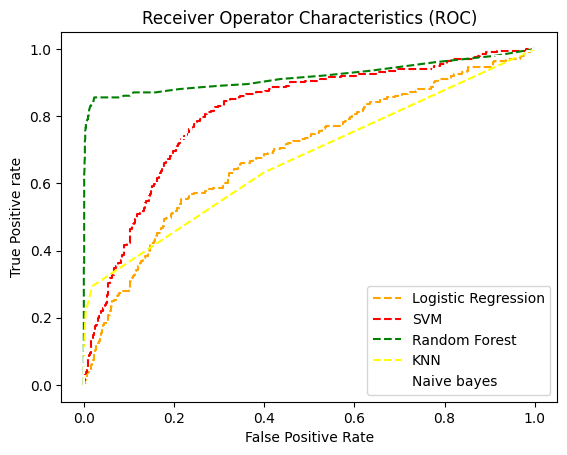

In [58]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

The graph represents that Random Forest algorithm produced the best AUC. Therefore, it is clear that Random Forest model did a better job of classifying the churned/retained telecom customers.

In [59]:
y_predict = model_rf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1299
           1       0.96      0.77      0.85       201

    accuracy                           0.96      1500
   macro avg       0.96      0.88      0.92      1500
weighted avg       0.96      0.96      0.96      1500



Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).

The following scores are the results of the Random Forest Classifier model

1. Accuracy: ~96% label accuracy
2. Precision: ~96% labeled as Retained customers and ~94% labeled as churned customers
3. Recall: ~99% labeled as Retained customers and ~76% labeled as churned customers

Note: We can improve this model even more better by using "Grid Search" method.

Great resource on Grid Search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

# GREAT JOB!

# FINAL CAPSTONE PROJECT

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.



There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


Complete the following tasks:
1. Import the "UCI_Credit_Card.csv" dataset
2. Perform Exploratory Data analysis and visualization (feel free to pick any reasonable data visualizations)
3. Prepare the data for model training and split it into training and testing
4. Train and evaluate an XG-Boost classifier model
5. Train and evaluate a Support Vector Machine classifier model
6. Train and evaluate a Naive Bayes classifier model
7. Train and evaluate a logistic regression model
8. Train and evaluate a Random Forest classifier model
9. Train and evaluate a K-Nearest Neighbors classifier model
10. Plot the ROC curve for all classifier and calculate the AUC
11. Which model performs the best?



Any publications based on this dataset should acknowledge the following:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset can be found here at the UCI Machine Learning Repository.



In [60]:
cc_df=pd.read_csv('UCI_Credit_Card.csv')
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [61]:
#No Nulls
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [62]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<Axes: xlabel='default.payment.next.month', ylabel='count'>

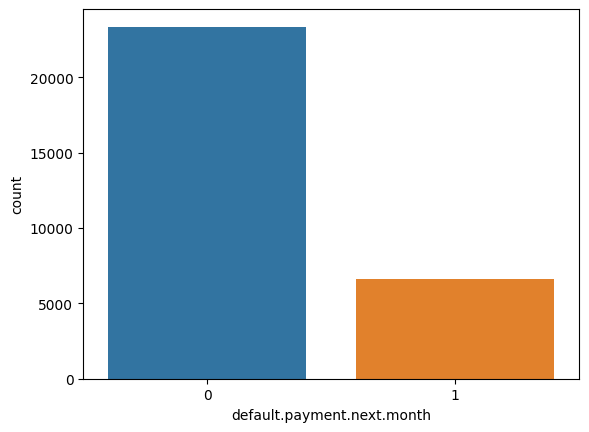

In [63]:
sns.countplot(data=cc_df, x='default.payment.next.month')

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'EDUCATION'}>,
        <Axes: title={'center': 'MARRIAGE'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>],
       [<Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <A

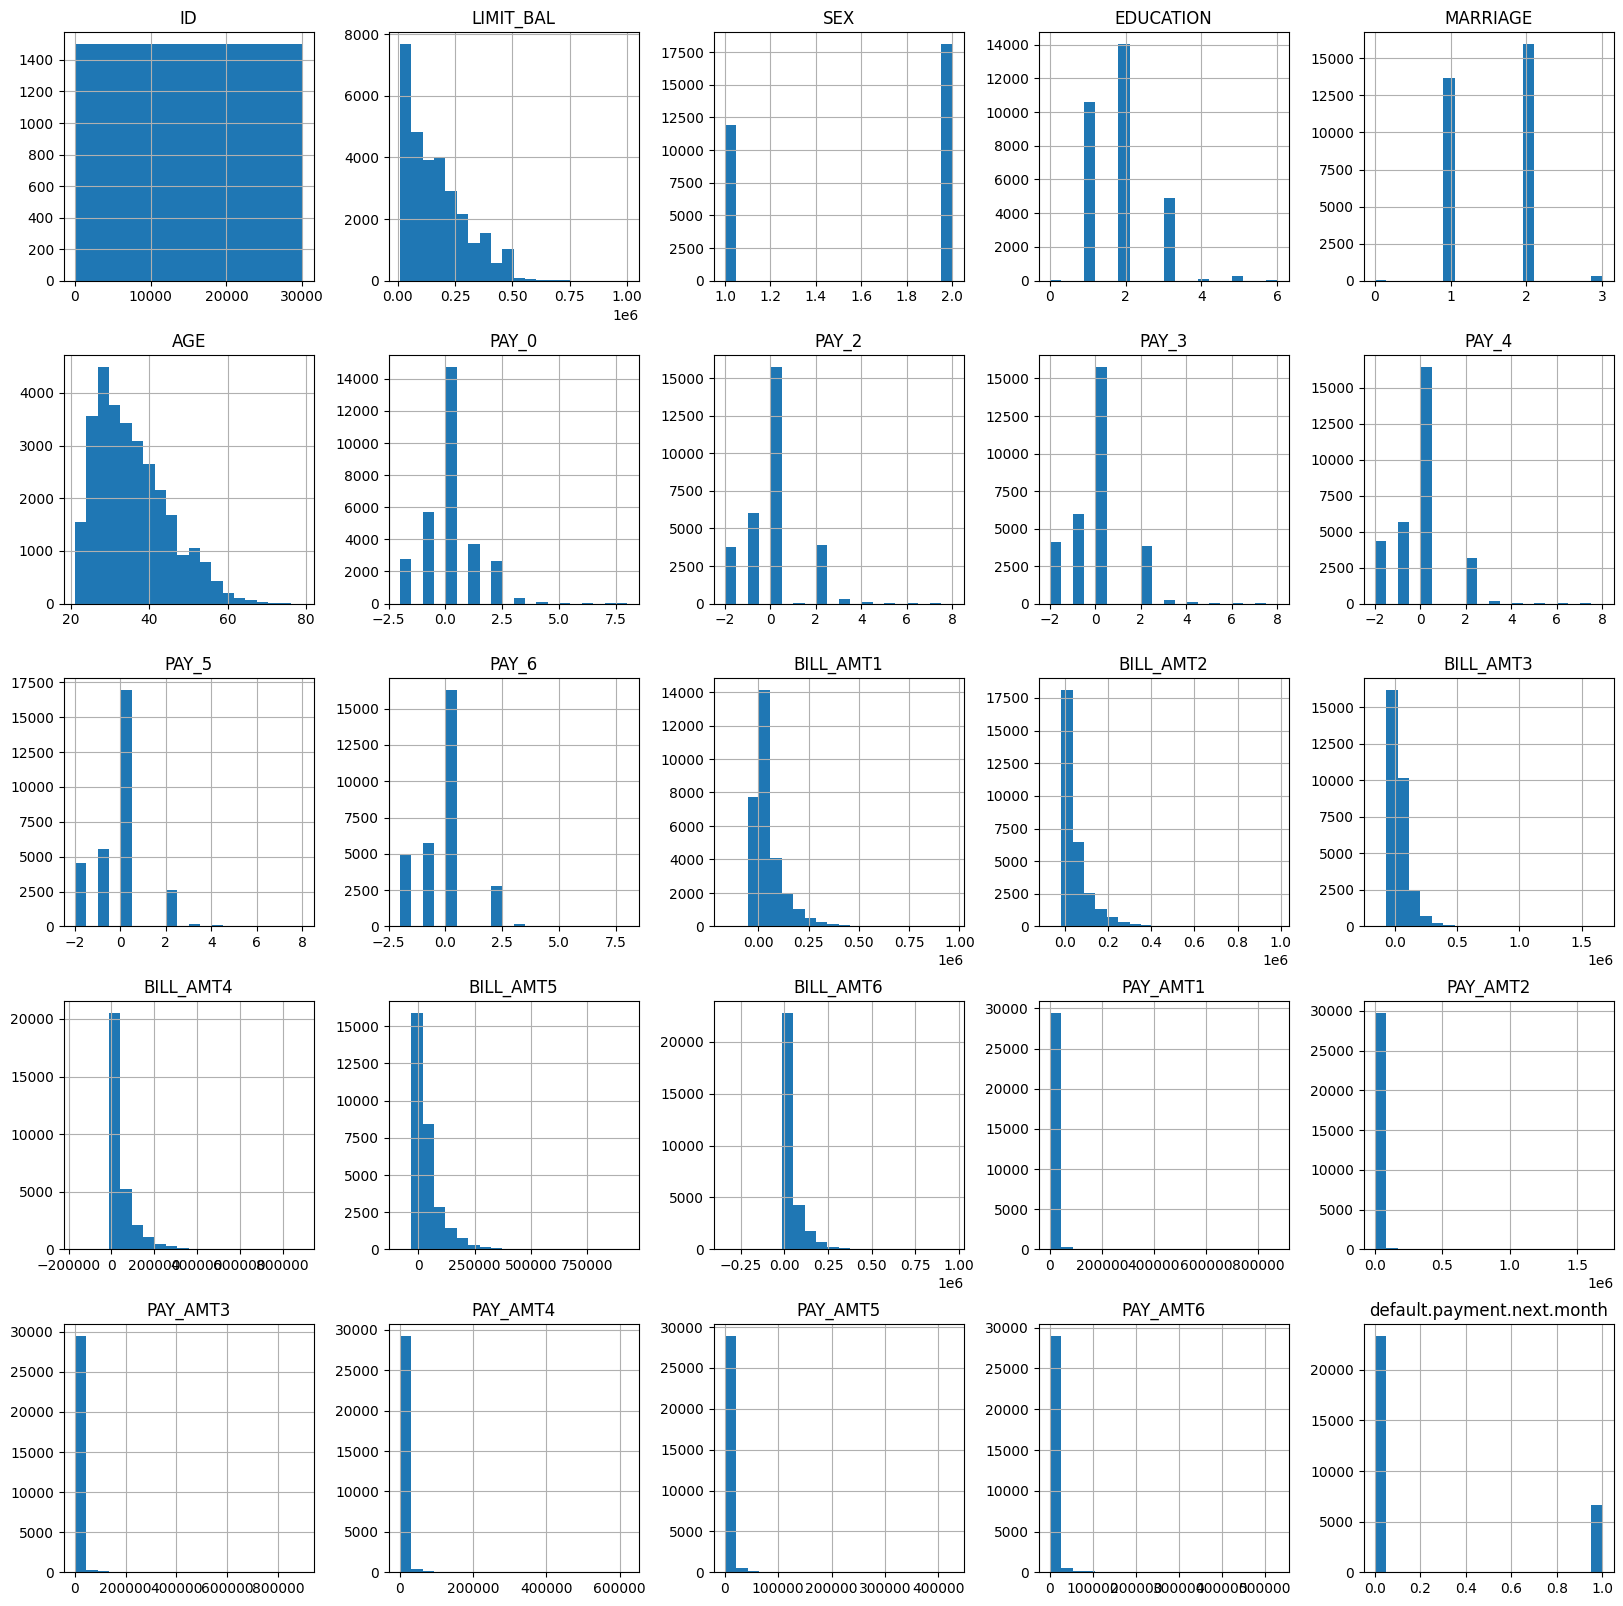

In [64]:
cc_df.hist(bins=20, figsize=(20, 20))

<Axes: xlabel='PAY_2', ylabel='BILL_AMT2'>

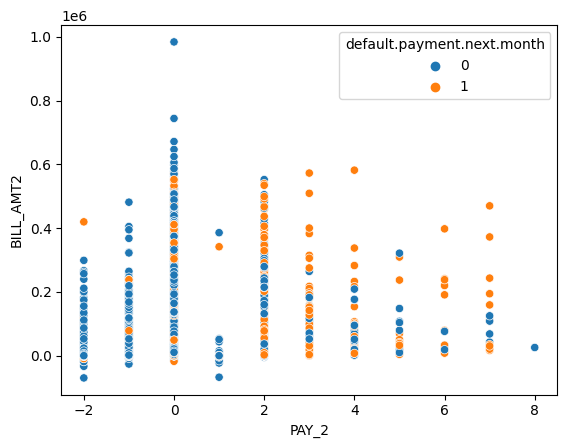

In [65]:
sns.scatterplot(x='PAY_2',y='BILL_AMT2',data=cc_df, hue='default.payment.next.month')

<Axes: >

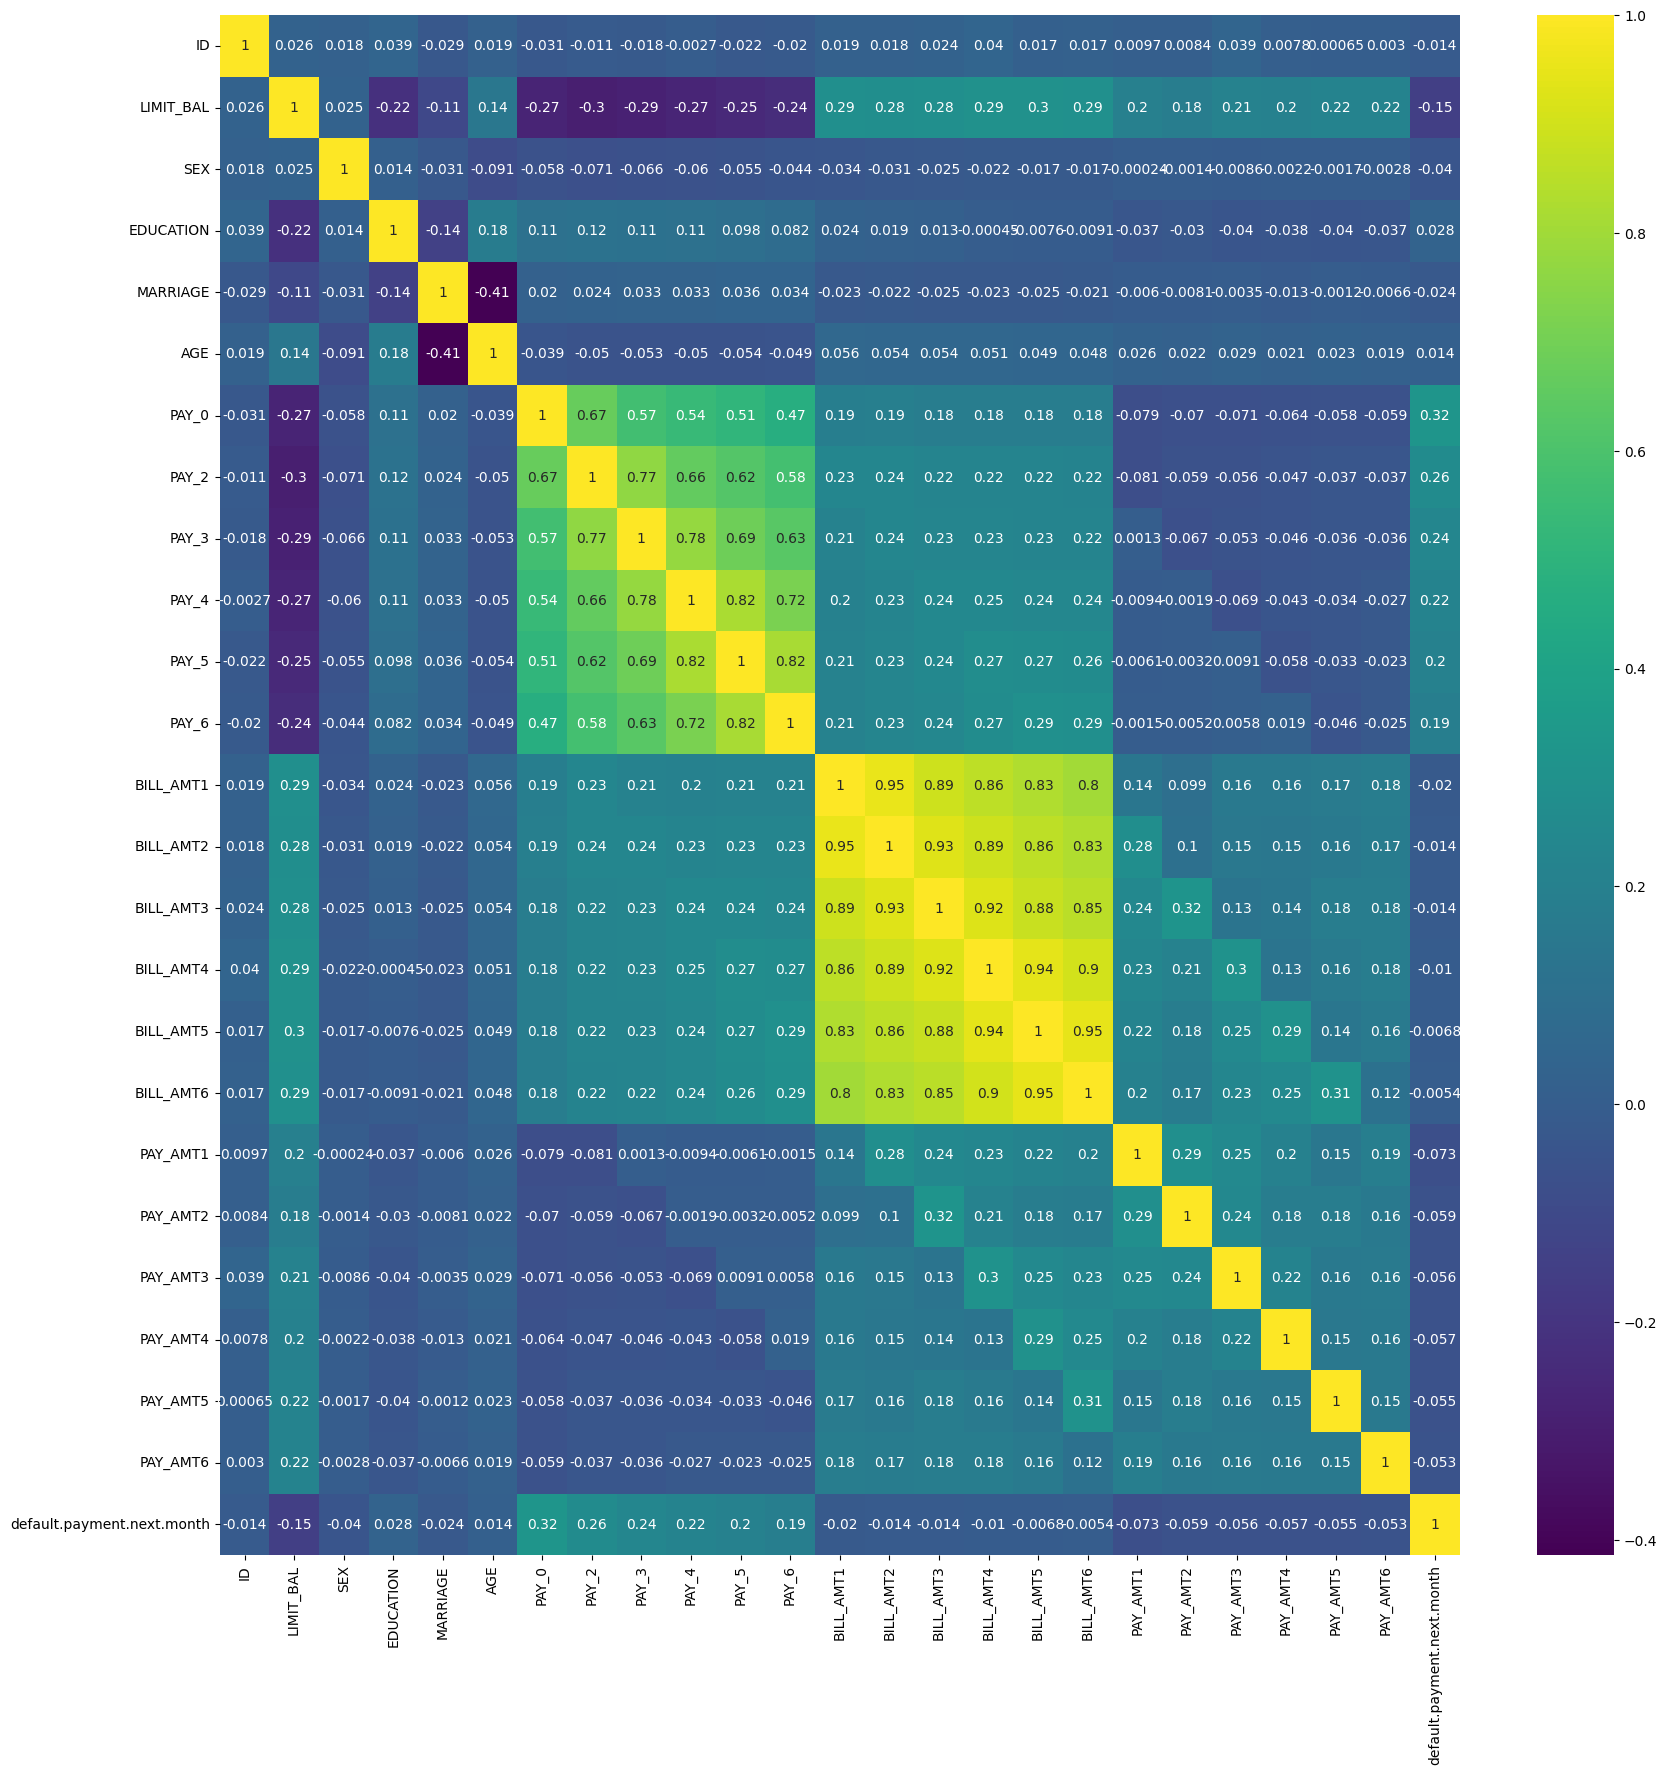

In [66]:
plt.figure(figsize=(20,20))
sns.heatmap(cc_df.corr(), cmap='viridis', annot=True)

In [67]:
X = cc_df.drop(columns=['ID','default.payment.next.month'])
y = cc_df['default.payment.next.month']

In [68]:
X.shape

(30000, 23)

In [69]:
y.shape

(30000,)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=3041266)

print('X train: ', X_train.shape)
print('X test: ', X_test.shape)
print('Y train: ', y_train.shape)
print('Y test: ', y_test.shape)

X train:  (22500, 23)
X test:  (7500, 23)
Y train:  (22500,)
Y test:  (7500,)


<Axes: >

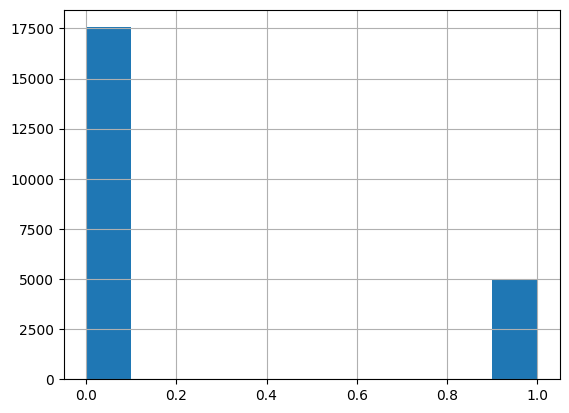

In [71]:
y_train.hist()

In [72]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(max_depth=2000, learning_rate=0.1, n_estimators=50000)

xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2000, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred = xgbc.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      5809
           1       0.57      0.36      0.44      1691

    accuracy                           0.80      7500
   macro avg       0.70      0.64      0.66      7500
weighted avg       0.77      0.80      0.78      7500



In [75]:
print(confusion_matrix(y_test, y_pred))

[[5361  448]
 [1088  603]]


In [76]:
model_svc = LinearSVC(max_iter=5000)
model_svm = CalibratedClassifierCV(model_svc)

model_svmc = model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [77]:
y_pred = model_svmc.predict(X_test)

In [78]:
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5809
           1       0.00      0.00      0.00      1691

    accuracy                           0.77      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.60      0.77      0.68      7500

Confusion Matrix:
[[5809    0]
 [1691    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#LR

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = model_LR.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      5809
           1       0.20      0.00      0.00      1691

    accuracy                           0.77      7500
   macro avg       0.49      0.50      0.44      7500
weighted avg       0.64      0.77      0.68      7500

[[5805    4]
 [1690    1]]


In [82]:
#RFC

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5809
           1       0.64      0.36      0.46      1691

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.79      0.81      0.79      7500

[[5470  339]
 [1087  604]]


In [83]:
#NB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)


GaussianNB()

In [84]:
y_pred = model_gnb.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.25      0.38      5809
           1       0.25      0.88      0.39      1691

    accuracy                           0.39      7500
   macro avg       0.56      0.56      0.39      7500
weighted avg       0.73      0.39      0.39      7500

[[1430 4379]
 [ 204 1487]]


In [86]:
#KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      5809
           1       0.41      0.19      0.26      1691

    accuracy                           0.75      7500
   macro avg       0.60      0.55      0.56      7500
weighted avg       0.71      0.75      0.72      7500

[[5340  469]
 [1369  322]]


Logistic Regression:  0.6587111355480428
Support Vector Machine:  0.6658461110581176
Random Forest:  0.7597552748294593
K-Nearest Neighbors:  0.6088381789753232
Naive Bayes:  0.6804045680864508
XG Boost:  0.7300430753518852


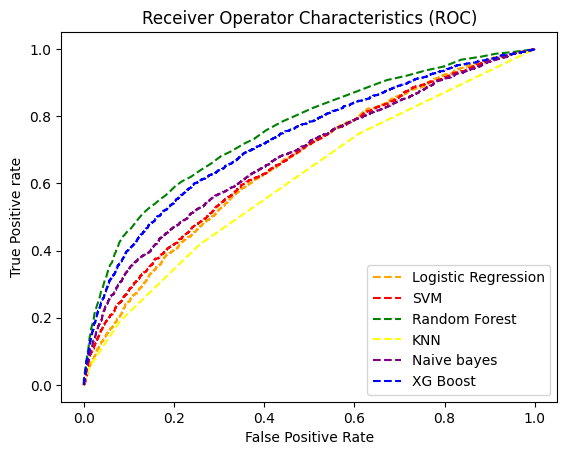

In [92]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svmc.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr6, tpr6, thresh6 = roc_curve(y_test, xgbc.predict_proba(X_test)[:, 1], pos_label = 1)


# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svmc.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])
auc_score6 = roc_auc_score(y_test, xgbc.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes
print("XG Boost: ", auc_score6) # Naive Bayes

plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "purple", label = "Naive bayes")
plt.plot(fpr6, tpr6, linestyle = "--", color = "blue", label = "XG Boost")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **What is the maximum and average daily minutes?**

In [88]:
# Display the statistical details of the dataframe
telecom_df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class,Daily Minutes
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400,581.317080
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469,89.071948
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000,520.600000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000,581.850000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000,642.025000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,876.900000


**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **Plot the KDE plot showing evening charges for both retained and churned customers**

<ipython-input-89-1b572a2c2414>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
<ipython-input-89-1b572a2c2414>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Distribution of evening charges by churn')

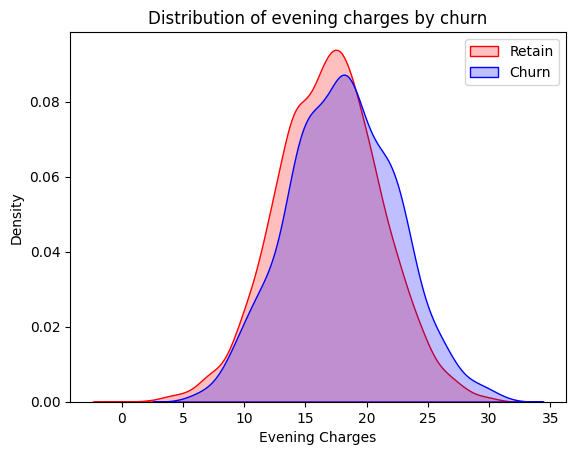

In [89]:
# Churn by evening charges
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_eve_charge[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Evening Charges")
ax.set_title("Distribution of evening charges by churn")

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Print out the confusion Matrix and comment on the results**


In [90]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

ValueError: ignored

**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Which of the following answers represent the Euclidean distance between the two points A(1, 3) and B(2, 3)?**

1. 2
2. 4
3. 1
4. 8

sqrt((1-2)^2 + (3-3)^2)= 1

# FINAL CAPSTONE PROJECT SOLUTION

# FINAL PROJECT TASK #1: IMPORT LIBRARIES/DATASETS AND PERFORM EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You have to include the full link to the csv file containing your dataset
creditcard_df = pd.read_csv('UCI_Credit_Card.csv')


In [ ]:
creditcard_df

In [ ]:
# 24 features in total, each contains 30000 data points
creditcard_df.info()

In [ ]:
creditcard_df.describe()

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull());

In [ ]:
# Plot Histogram
creditcard_df.hist(bins = 30, figsize = (20,20), color = 'b');

In [ ]:
# Let's drop the ID column
creditcard_df.drop(['ID'], axis = 1, inplace = True)

In [ ]:
creditcard_df

In [ ]:
# Let's see how many customers could potentially default on their credit card payment!
cc_default_df        = creditcard_df[creditcard_df['default.payment.next.month'] == 1]
cc_nodefault_df      = creditcard_df[creditcard_df['default.payment.next.month'] == 0]


In [ ]:
cc_default_df

In [ ]:
cc_nodefault_df

In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset

print("Total =", len(creditcard_df))

print("Number of customers who defaulted on their credit card payments =", len(cc_default_df))
print("Percentage of customers who defaulted on their credit card payments =", 1.*len(cc_default_df)/len(creditcard_df)*100.0, "%")

print("Number of customers who did not default on their credit card payments (paid their balance)=", len(cc_nodefault_df))
print("Percentage of customers who did not default on their credit card payments (paid their balance)=", 1.*len(cc_nodefault_df)/len(creditcard_df)*100.0, "%")

In [ ]:
# Let's compare the mean and std of the customers who stayed and left
cc_default_df.describe()

In [ ]:
# Let's compare the mean and std of the customers who stayed and left
cc_nodefault_df.describe()

In [ ]:
# Plot the correlation matrix
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True);

In [ ]:
plt.figure(figsize=[10,20])
plt.subplot(211)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df, showfliers = False);
plt.subplot(212)
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', data = creditcard_df);


# FINAL PROJECT TASK #2: PREPARE TRAINING AND TESTING DATASET

In [ ]:
X_cat = creditcard_df[['SEX', 'EDUCATION', 'MARRIAGE']]
X_cat

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

In [ ]:
# note that we dropped the target 'default.payment.next.month'
X_numerical = creditcard_df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_numerical

In [ ]:
X = pd.concat([X_cat, X_numerical], axis = 1)
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
y = creditcard_df['default.payment.next.month']
y

In [ ]:
creditcard_df.info()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

# FINAL PROJECT TASK #3: TRAIN AN XG-BOOST CLASSIFIER MODEL

In [ ]:
!pip install xgboost

In [ ]:
# Train an XGBoost classifier model
import xgboost as xgb
model_xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 20, use_label_encoder = False)
model_xgb.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_predict = model_xgb.predict(X_test)

In [ ]:
y_predict

In [ ]:
y_test

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy {} %".format( 100 * accuracy_score(y_predict, y_test)))

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

In [ ]:
print(classification_report(y_test, y_predict))

# FINAL PROJECT TASK #4: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression(max_iter = 10000)
model_LR.fit(X_train, y_train)

In [ ]:
y_predict = model_LR.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))
# precision is the ratio of TP/(TP+FP)
# recall is the ratio of TP/(TP+FN)
# F-beta score can be interpreted as a weighted harmonic mean of the precision and recall
# where an F-beta score reaches its best value at 1 and worst score at 0.


In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #5: TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=1000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

In [ ]:
y_predict = model_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #6: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #7: TRAIN AND EVALUATE A K-NEAREST NEIGHBOUR (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #8: TRAIN AND EVALUATE A NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
# Model Performance on the Testing dataset
cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True, fmt = 'd');

# FINAL PROJECT TASK #9: PLOT ROC CURVES FOR THE 5 MODELS AND FIND AUC SCORES

Check this out: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, model_xgb.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [ ]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score0 = roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1])
auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("XG-Boost Classifier: ", auc_score0) # XG-Boost
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

In [ ]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "XG-Boost")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()